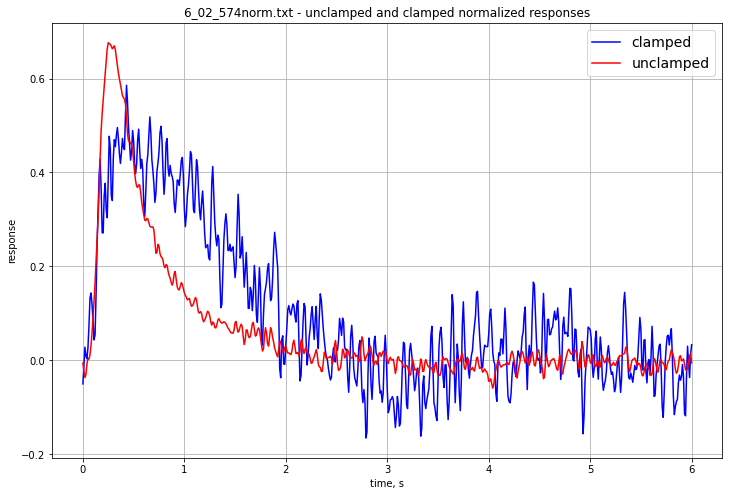

In [49]:
from scipy.ndimage import gaussian_filter1d
#v. 20231108.1
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, optimize


input_dir = "./pde-extraction/"
filename = "6_02_574norm.txt"

unclamped = []
clamped = []
t = []
with open(input_dir + filename, 'r', encoding='utf-8') as file:
    for line in file:
        r0, r1, r2 = (float('0' if num == '.' else num) for num in line.split())
        unclamped.append(r0)
        clamped.append(r1)
        t.append(r2)
unclamped = np.array(unclamped)
clamped = np.array(clamped)
t = np.array(t)

# https://support.ptc.com/help/mathcad/r8.0/ru/index.html#page/PTC_Mathcad_Help/gaussian_kernel_smoothing.html#wwID0ELY5U
# unclampeds = gaussian_filter1d(unclamped, sigma=0.37)
# clampeds = gaussian_filter1d(clamped, sigma=0.37)

fig, ax = plt.subplots()
ax.plot(t, clamped, 'b', label='clamped')
ax.plot(t, unclamped, 'r', label='unclamped')
# ax.plot(t, unclampeds, 'g', label='unclampeds')
# ax.plot(t, clampeds, 'g', label='clampeds')
fig.set_figwidth(12)
fig.set_figheight(8)
ax.set_title(f'{filename} - unclamped and clamped normalized responses')
ax.set_xlabel('time, s')
ax.set_ylabel('response')
ax.legend(prop={"size": 14})
ax.grid()

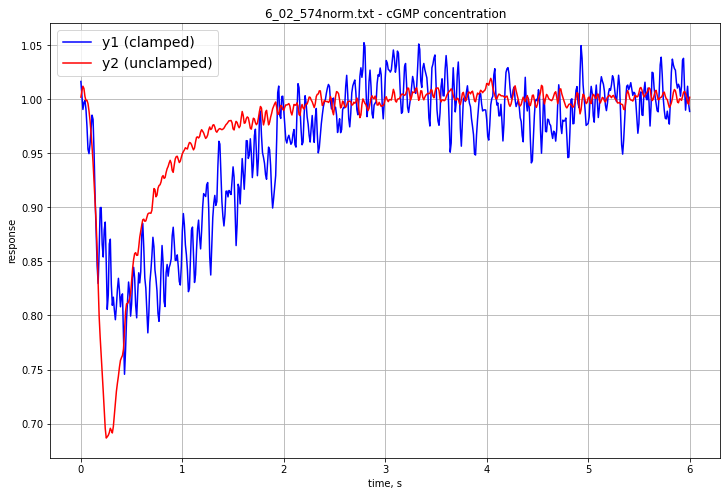

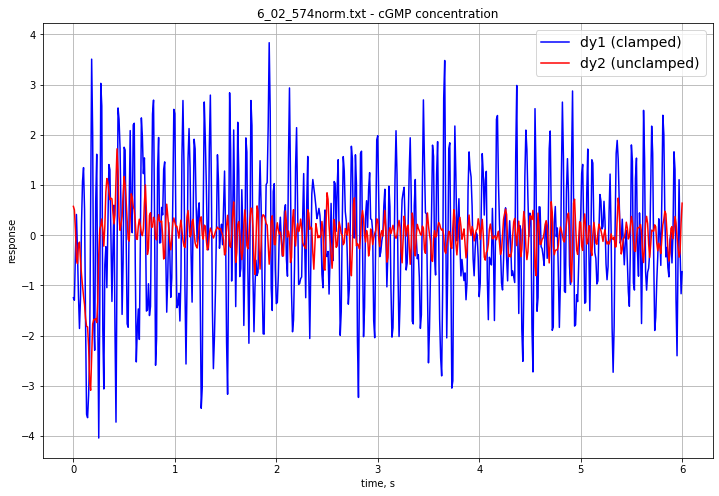

In [50]:
h = 3   # channels's cooperativity
y1 = (1 - clamped) ** (1 / h)
y2 = (1 - unclamped) ** (1 / h)

fig, ax = plt.subplots()
ax.plot(t, y1, 'b', label='y1 (clamped)')
ax.plot(t, y2, 'r', label='y2 (unclamped)')
fig.set_figwidth(12)
fig.set_figheight(8)
ax.set_title(f'{filename} - cGMP concentration')
ax.set_xlabel('time, s')
ax.set_ylabel('response')
ax.legend(prop={"size": 14})
ax.grid()

dy1 = np.gradient(y1, t[1] - t[0])
dy2 = np.gradient(y2, t[1] - t[0])

fig, ax = plt.subplots()
ax.plot(t, dy1, 'b', label='dy1 (clamped)')
ax.plot(t, dy2, 'r', label='dy2 (unclamped)')
fig.set_figwidth(12)
fig.set_figheight(8)
ax.set_title(f'{filename} - cGMP concentration')
ax.set_xlabel('time, s')
ax.set_ylabel('response')
ax.legend(prop={"size": 14})
ax.grid()

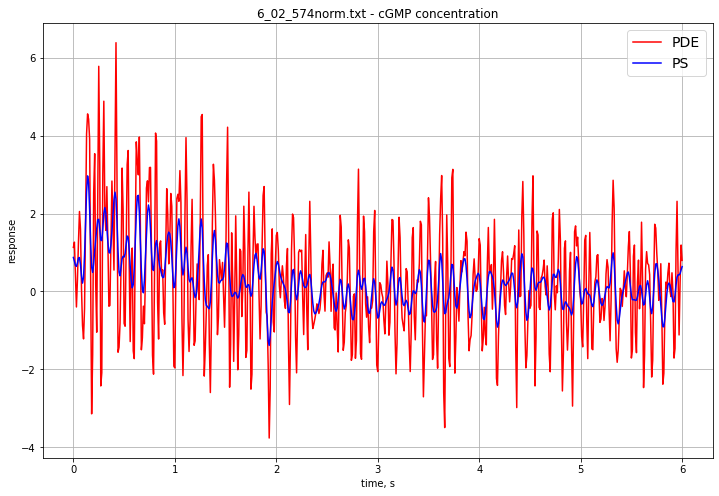

In [51]:
betad = 3.5 + 2.247
alpha = betad
beta = (alpha - dy1) / y1 - betad
PDE = beta
PS = gaussian_filter1d(PDE, sigma=2)

fig, ax = plt.subplots()
ax.plot(t, PDE, 'r', label='PDE')
ax.plot(t, PS, 'b', label='PS')
fig.set_figwidth(12)
fig.set_figheight(8)
ax.set_title(f'{filename} - cGMP concentration')
ax.set_xlabel('time, s')
ax.set_ylabel('response')
ax.legend(prop={"size": 14})
ax.grid()